# Problem 2
##### Submitted by Amin Shojaeighadikolaei

Problem 2 Consider the Fashion MNIST dataset. First find the optimal MLP net with two hidden layers. Then find the CNN with two convolutional and one fully connected hidden layers such that the validation loss is about the same as for the MLP. Compare the two optimal models in terms of the number of parameters and the test accuracy.

### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
print(tf.__version__)


2.2.0-dev20200411


### Functions

In [2]:

ACCURACY_THRESHOLD = 0.99
class myCallback (tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > ACCURACY_THRESHOLD):
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
            self.model.stop_training = True
          
       

def One_hot(X):
      
    onehot_encoder = OneHotEncoder(sparse=False)
    temp = X.reshape(len(X), 1)
    onehots = onehot_encoder.fit_transform(temp)
    return(onehots)


def create_model ( layers):
    model=tf.keras.models.Sequential()
    model.add( tf.keras.layers.Flatten(input_shape=(28, 28)) )
    for i, nodes in enumerate(layers):
        model.add( tf.keras.layers.Dense(nodes, activation='relu') )
    model.add( tf.keras.layers.Dense(10, activation='softmax') )
    
    model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
    
    return model

### Load Dataset

In [3]:

(images_train, labels_train), (images_test, labels_test) = fashion_mnist.load_data()
images_train, images_test = images_train/255.0, images_test/255.0

x_val = images_train[-15000:]
y_val = labels_train[-15000:]
images_train = images_train[:-15000]
labels_train = labels_train[:-15000]

layers = [ [5] ,[20],[200], [1000]]
callbacks = myCallback()
LOSS = []


### MLP (Find optimal numebr of nodes)

Simulation for [5, 5] layer: 
313/313 [==============================] - 0s 731us/step - loss: 0.5158 - accuracy: 0.8169
Simulation for [20, 20] layer: 
313/313 [==============================] - 0s 766us/step - loss: 0.4231 - accuracy: 0.8497
Simulation for [50, 50] layer: 
313/313 [==============================] - 0s 873us/step - loss: 0.3827 - accuracy: 0.8670
Simulation for [100, 100] layer: 
313/313 [==============================] - 0s 882us/step - loss: 0.3735 - accuracy: 0.8740
Simulation for [150, 150] layer: 
313/313 [==============================] - 0s 907us/step - loss: 0.3582 - accuracy: 0.8799


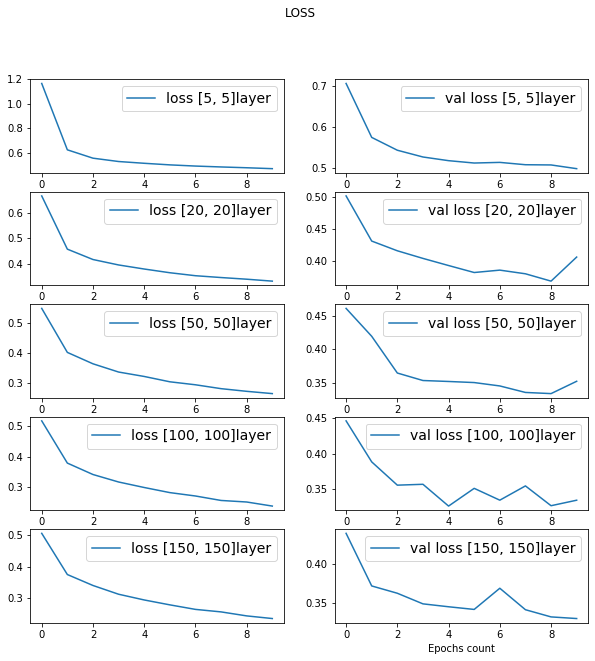

In [4]:

layers = [ [5,5] ,[20,20],[50,50], [100,100] ,[150,150]]

callbacks = myCallback()
LOSS = []
test_loss_total_2=[]
test_accuracy_total_2=[]
for i in layers:
    mlp= create_model(i)
    print('Simulation for '+str(i)+' layer: ')
    
 
    history= mlp.fit(images_train, labels_train,validation_data=(x_val,y_val), epochs=10,verbose=0,callbacks=[callbacks])
    
    # convert the history.history dict to a pandas DataFrame:     
    hist_df = pd.DataFrame(history.history)
    loss=hist_df.to_numpy()
    LOSS.append(loss)
    
    test_loss_2 , test_accuracy_2 = mlp.evaluate(images_test, labels_test, verbose=1)
    test_loss_total_2.append(test_loss_2)
    test_accuracy_total_2.append(test_accuracy_2)
    
################### Plot(for two hidden layer)################################
# LOSS
# loss.shape
Looss= np.array(LOSS)
final_loss=[[] for i in range(len(layers))]
final_val_loss=[[] for i in range(len(layers))]
for i in range(len(layers)):
    for j in range(Looss[i].shape[0]):
        final_loss[i].append(Looss[i][j][0])
        final_val_loss[i].append(Looss[i][j][2])
   
fig, axs= plt.subplots(5,2 , figsize=(10,10))
fig.suptitle('LOSS')

plt.xlabel('Epochs count')
for i in range(len(layers)):
    
    axs[i,0].plot(final_loss[i],label='loss '+str(layers[i])+'layer')
    axs[i,0].legend(fontsize=14)
    axs[i,1].plot(final_val_loss[i],label='val loss '+str(layers[i])+'layer')
    axs[i,1].legend(fontsize=14)

plt.savefig('comparison for two hidden layer.png')
plt.show()


As it shown, MLP is considered for 5 different number of nodes and the optimal number of ndes can be consider as [100,100]. With this number of nodes the Accuracy and loss for test is:

Simulation for [100, 100] layer: 
313/313 [==============================] - 0s 882us/step - loss: 0.3735 - accuracy: 0.8740

### CNN part

For the CNN part I want to create a CNN with two convolutional and one fully connected hidden layer. For doing this, I considered 16 features for first convolute layer and 32 feature for the next one and 200 nodes for the fully connected layer.In addition, I selected the kernel as [5,5] for both convuluted layers.


In [5]:

# input image dimensions
img_rows, img_cols = 28, 28
images_train = images_train.reshape(images_train.shape[0], img_rows, img_cols, 1)
images_test = images_test.reshape(images_test.shape[0], img_rows, img_cols, 1)
x_val= x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

x_train = images_train.astype('float32')
x_test = images_test.astype('float32')
x_val = x_val.astype('float32')

print('x_train shape:', x_train.shape)
print("Training samples: {}".format(x_train.shape[0]))
print("Test samples: {}".format(x_test.shape[0]))

y_train=One_hot(labels_train)
y_test=One_hot(labels_test)
y_val=One_hot(y_val)

model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5),
                  activation='relu',
                  input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])



model.fit(x_train, y_train,
          batch_size=512,
          epochs=200,
          verbose=2,
          validation_data=(x_val, y_val))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

x_train shape: (45000, 28, 28, 1)
Training samples: 45000
Test samples: 10000
Epoch 1/10
88/88 - 10s - loss: 1.0382 - accuracy: 0.6304 - val_loss: 0.5781 - val_accuracy: 0.7800
Epoch 2/10
88/88 - 10s - loss: 0.5960 - accuracy: 0.7777 - val_loss: 0.4786 - val_accuracy: 0.8187
Epoch 3/10
88/88 - 10s - loss: 0.5138 - accuracy: 0.8119 - val_loss: 0.4229 - val_accuracy: 0.8413
Epoch 4/10
88/88 - 10s - loss: 0.4621 - accuracy: 0.8341 - val_loss: 0.3889 - val_accuracy: 0.8551
Epoch 5/10
88/88 - 11s - loss: 0.4265 - accuracy: 0.8467 - val_loss: 0.3682 - val_accuracy: 0.8641
Epoch 6/10
88/88 - 10s - loss: 0.4065 - accuracy: 0.8544 - val_loss: 0.3489 - val_accuracy: 0.8719
Epoch 7/10
88/88 - 10s - loss: 0.3877 - accuracy: 0.8603 - val_loss: 0.3367 - val_accuracy: 0.8747
Epoch 8/10
88/88 - 10s - loss: 0.3724 - accuracy: 0.8652 - val_loss: 0.3260 - val_accuracy: 0.8803
Epoch 9/10
88/88 - 10s - loss: 0.3552 - accuracy: 0.8719 - val_loss: 0.3144 - val_accuracy: 0.8837
Epoch 10/10
88/88 - 10s - loss:

As it shown, the validation loss is same as MLP but the test accuracy and loss is better than MLP.